## PyFolio Portfolio Analysis
Quantopian has a built-in library called PyFolio that quickly creates "tear-sheets" and useful

In [1]:
import pyfolio as pf
import matplotlib.pyplot as plt
import empyrical

In [3]:
# Algo Returns
bt = get_backtest('5f266f2d0fcffa46dc0cc21a') #hash from url

100% Time:  0:00:00|##########################################################|


In [4]:
bt_returns = bt.daily_performance['returns']

In [5]:
bt_positions = bt.pyfolio_positions

In [6]:
bt_transactions = bt.pyfolio_transactions

In [7]:
# Benchmark
benchmark_return = get_backtest('5f2673542b2c1a47020e4643') #hash from url

100% Time:  0:00:00|##########################################################|


In [9]:
bm_returns = benchmark_return.daily_performance['returns']

In [10]:
bm_positions = benchmark_return.pyfolio_positions
bm_transactions = benchmark_return.pyfolio_transactions

In [12]:
empyrical.sharpe_ratio(bt_returns)

2.212230571596653

In [13]:
empyrical.sharpe_ratio(bm_returns)

0.2721926654125698

In [14]:
empyrical.beta(bt_returns,bm_returns)

-0.2070350045447502

In [15]:
benchmark_rets = bm_returns

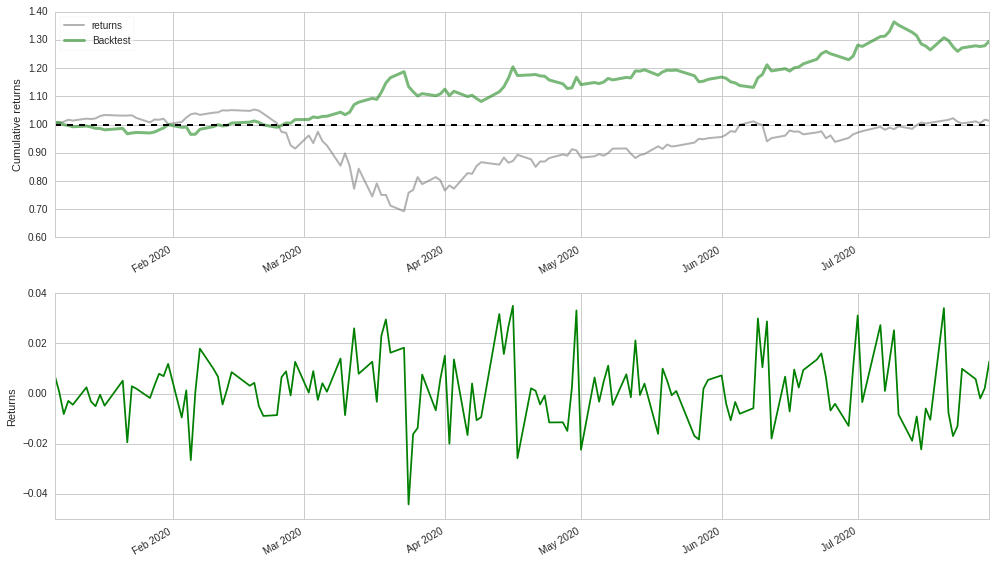

In [16]:
# Cumulative Returns
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(bt_returns,benchmark_rets)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plotting.plot_returns(bt_returns)
plt.tight_layout()

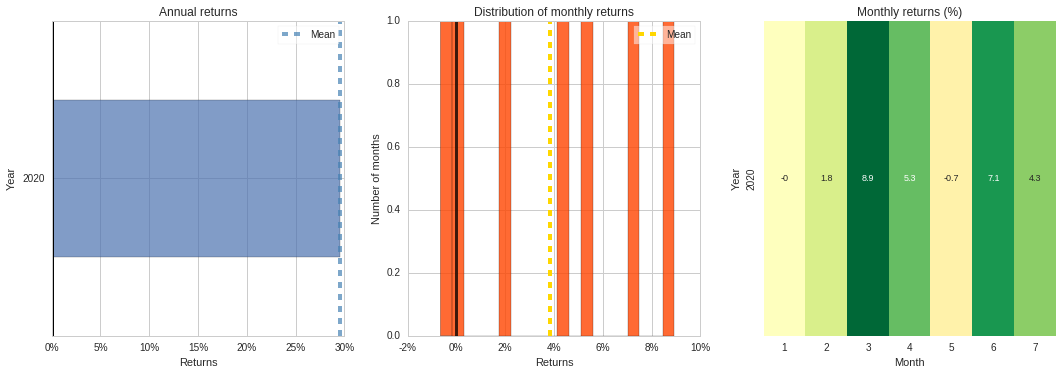

In [17]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(15,5)

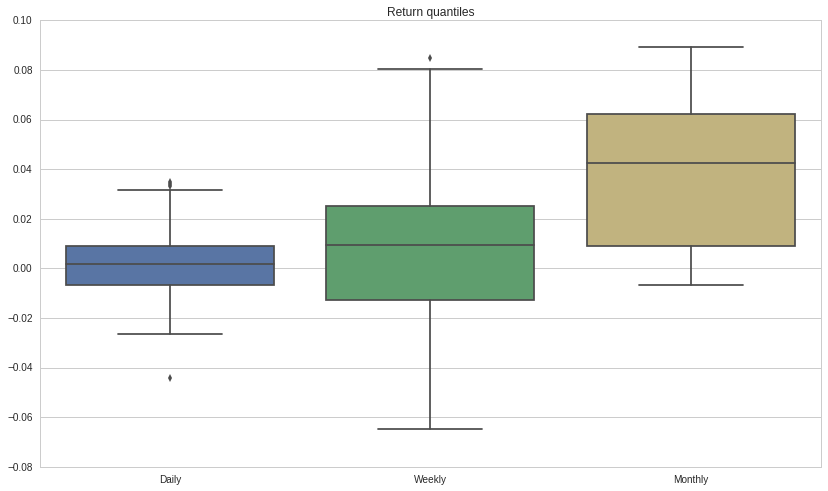

In [18]:
pf.plot_return_quantiles(bt_returns)

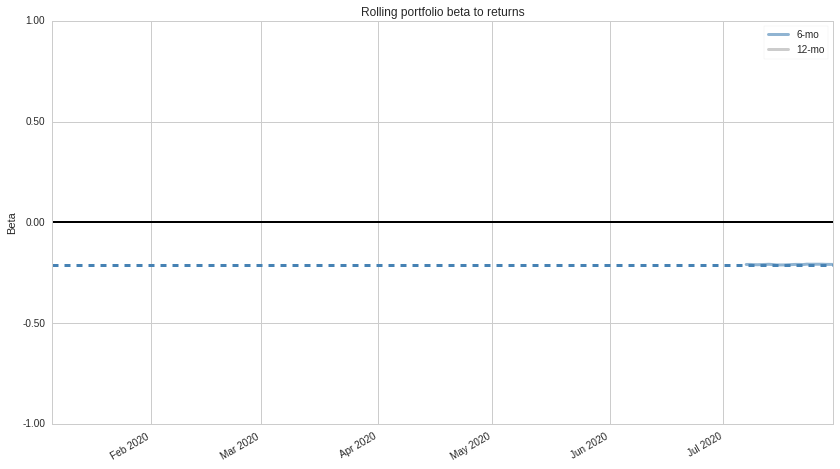

In [20]:
pf.plot_rolling_beta(bt_returns,benchmark_rets);

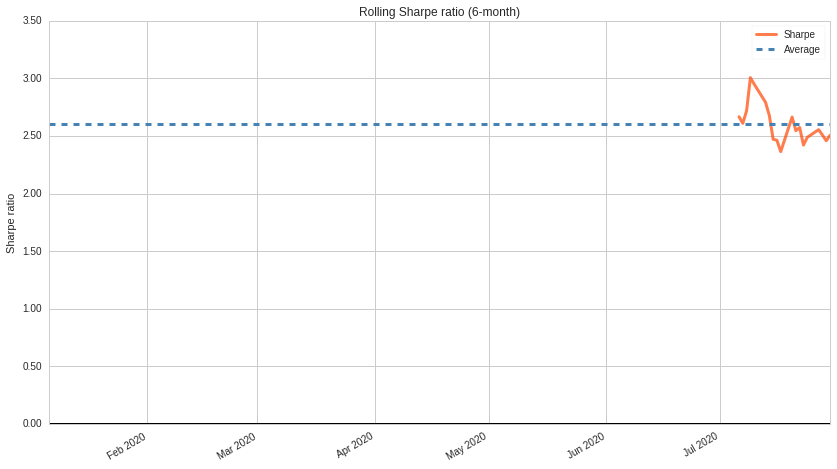

In [22]:
pf.plot_rolling_sharpe(bt_returns);

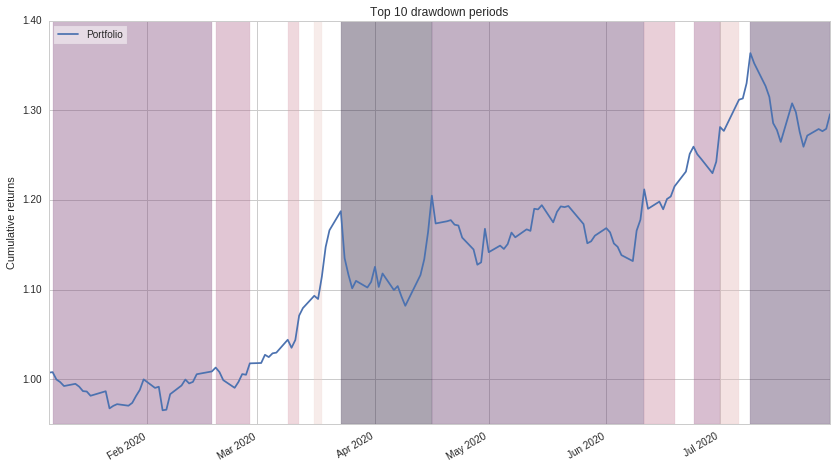

In [23]:
pf.plot_drawdown_periods(bt_returns)

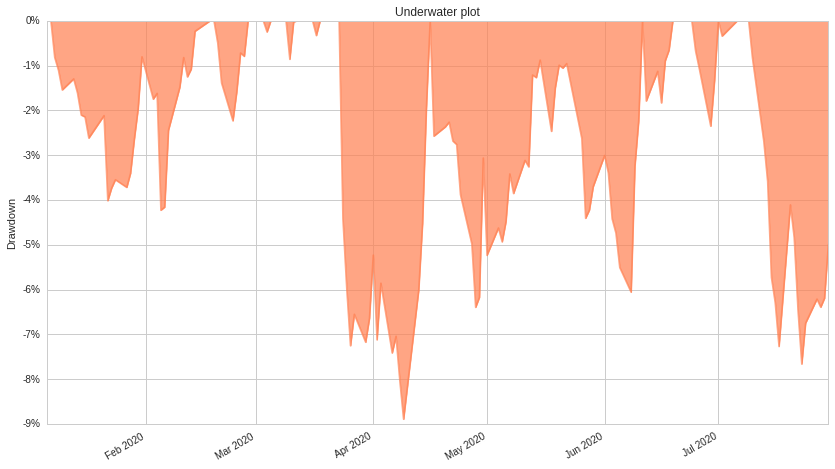

In [24]:
pf.plot_drawdown_underwater(bt_returns)

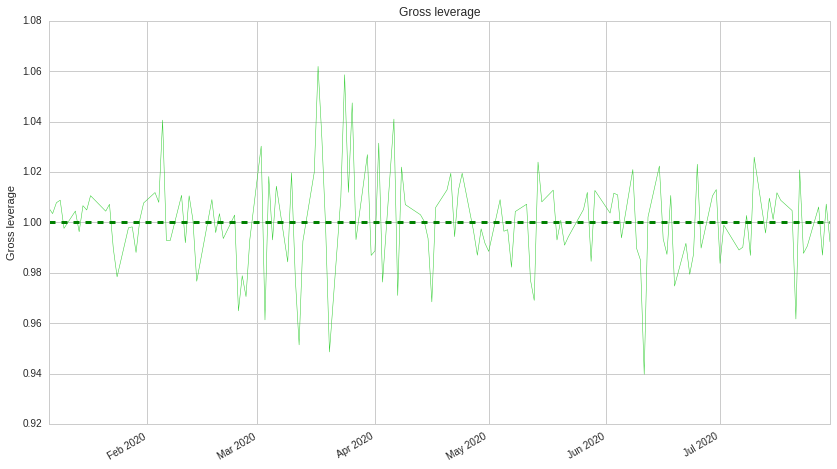

In [25]:
pf.plot_gross_leverage(bt_returns,bt_positions)

Top 10 long positions of all time,max
AMZN-16841,52.04%


Top 10 short positions of all time,max
IBM-3766,-54.44%


Top 10 positions of all time,max
IBM-3766,54.44%
AMZN-16841,52.04%


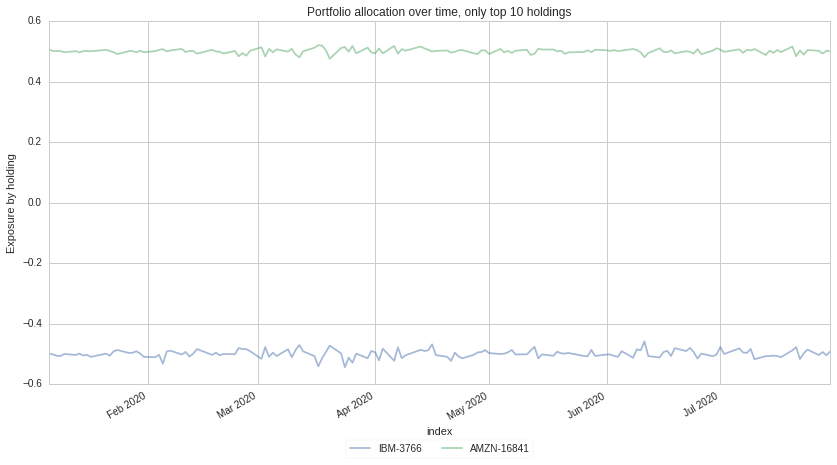

In [26]:
pos_percent = pf.pos.get_percent_alloc(bt_positions)
pf.plotting.show_and_plot_top_positions(bt_returns, pos_percent);

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,159.00,71.00,88.00
Percent profitable,0.68,0.38,0.92
Winning round_trips,108.00,27.00,81.00
Losing round_trips,51.00,44.00,7.00
Even round_trips,0.00,0.00,0.00


PnL stats,All trades,Short trades,Long trades
Total profit,$3083093.93,$-37046.61,$3120140.54
Gross profit,$3999648.63,$850517.55,$3149131.08
Gross loss,$-916554.70,$-887564.16,$-28990.54
Profit factor,$4.36,$0.96,$108.63
Avg. trade net profit,$19390.53,$-521.78,$35456.14
Avg. winning trade,$37033.78,$31500.65,$38878.16
Avg. losing trade,$-17971.66,$-20171.91,$-4141.51
Ratio Avg. Win:Avg. Loss,$2.06,$1.56,$9.39
Largest winning trade,$1888322.54,$132337.19,$1888322.54
Largest losing trade,$-114847.62,$-114847.62,$-19826.69


Duration stats,All trades,Short trades,Long trades
Avg duration,84 days 13:45:01.132075,70 days 22:34:54.084507,95 days 13:42:57.272727
Median duration,85 days 00:00:00,80 days 00:00:00,107 days 11:00:00
Longest duration,155 days 23:00:00,116 days 00:00:00,155 days 23:00:00
Shortest duration,0 days 13:31:59,0 days 13:31:59,0 days 13:31:59


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.16%,0.24%,0.09%
Avg returns winning,0.30%,0.48%,0.17%
Avg returns losing,-0.15%,-0.24%,-0.07%
Median returns all round_trips,0.04%,0.07%,0.02%
Median returns winning,0.09%,0.12%,0.08%
Median returns losing,-0.07%,-0.16%,-0.02%
Largest winning trade,14.76%,14.76%,1.11%
Largest losing trade,-0.90%,-0.90%,-0.65%


Symbol stats,AMZN-16841,IBM-3766
Avg returns all round_trips,0.09%,0.24%
Avg returns winning,0.17%,0.48%
Avg returns losing,-0.07%,-0.24%
Median returns all round_trips,0.02%,0.06%
Median returns winning,0.08%,0.12%
Median returns losing,-0.02%,-0.16%
Largest winning trade,1.11%,14.76%
Largest losing trade,-0.65%,-0.90%


Profitability (PnL / PnL total) per name,
AMZN-16841,101.20%
IBM-3766,-1.20%


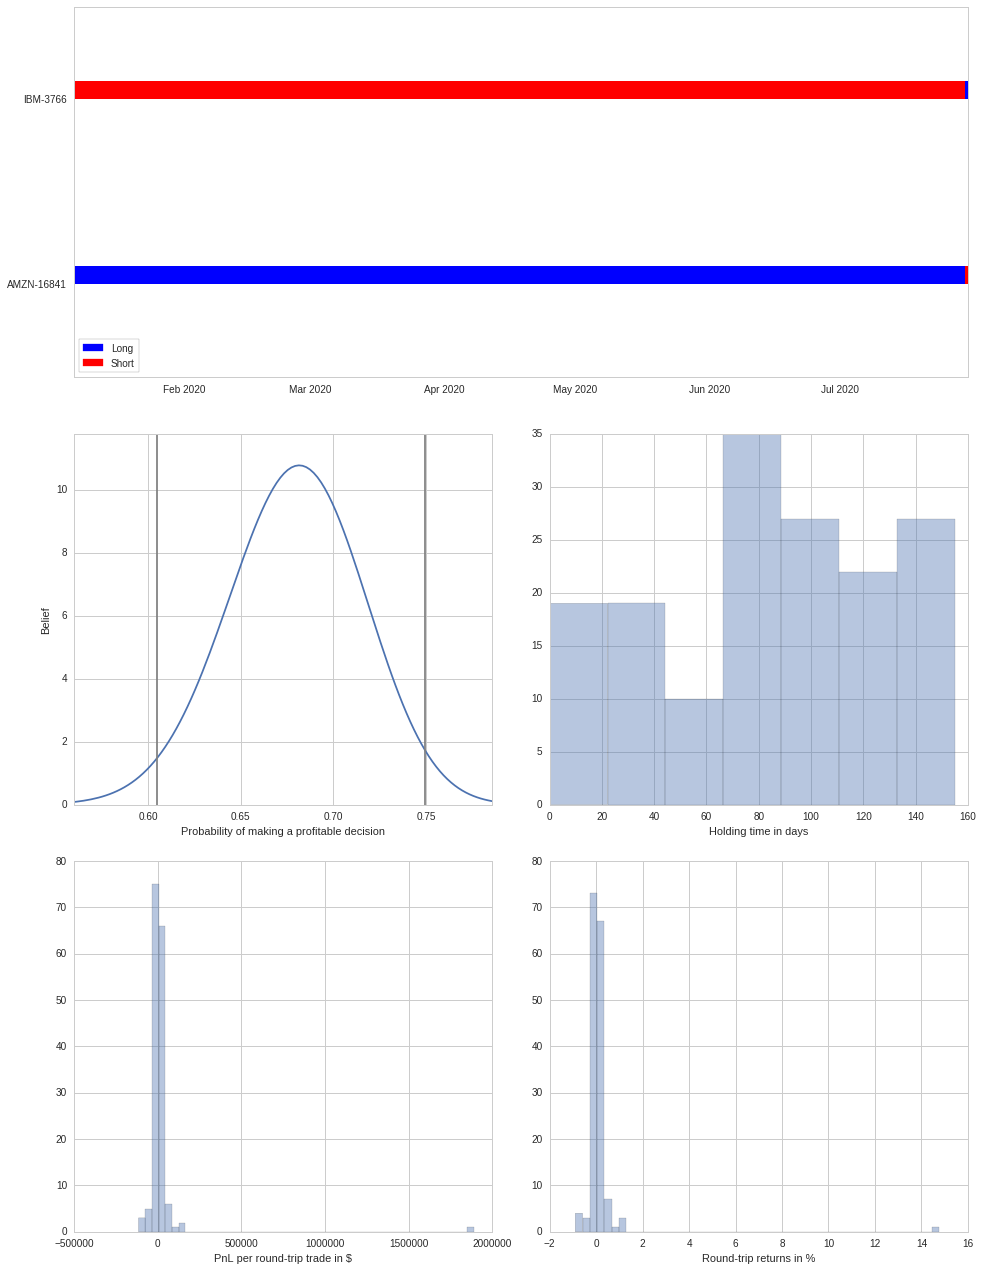

In [28]:
pf.create_round_trip_tear_sheet(bt_returns, bt_positions, bt_transactions)